In [2]:
import pandas as pd

df = pd.read_csv('./data/Data EGT N1Vib ACC ITT.csv', parse_dates=['RECORDED_DT'])

df.groupby(['AIRCRAFT']).size()

AIRCRAFT
VP-BWB    1475
VP-BWM    1250
VP-BWN     991
VQ-BCR    2843
VQ-BDQ    1294
VQ-BDU    2260
VQ-BGU    1813
VQ-BRA       8
VQ-BRI    1251
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13185 entries, 0 to 13184
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRCRAFT             13185 non-null  object        
 1   POSITION             13185 non-null  int64         
 2   ESN                  13185 non-null  int64         
 3   RECORDED_DT          13185 non-null  datetime64[ns]
 4   EGTM                 13064 non-null  float64       
 5   N1 track Vib (Turb)  12959 non-null  float64       
 6   ACC                  12991 non-null  float64       
 7   ITT                  13018 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 824.2+ KB


In [4]:
bgu = pd.read_csv('./takeoff-merged-VQ-BGU-30s.csv', parse_dates=['reportts'])
bdu = pd.read_csv('./takeoff-merged-VQ-BDU-30s.csv', parse_dates=['reportts'])

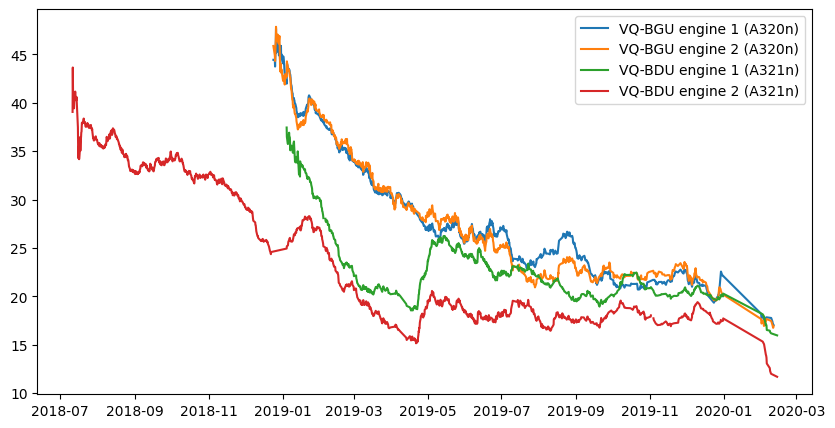

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bgu[bgu['pos'] == 1]['reportts'], bgu[bgu['pos'] == 1]['egtm'], '-')
ax.plot(bgu[bgu['pos'] == 2]['reportts'], bgu[bgu['pos'] == 2]['egtm'], '-')
ax.plot(bdu[bdu['pos'] == 1]['reportts'], bdu[bdu['pos'] == 1]['egtm'], '-')
ax.plot(bdu[bdu['pos'] == 2]['reportts'], bdu[bdu['pos'] == 2]['egtm'], '-')
ax.legend(['VQ-BGU engine 1 (A321neo)', 'VQ-BGU engine 2 (A321neo)', 'VQ-BDU engine 1 (A321neo)', 'VQ-BDU engine 2 (A321neo)'])
plt.show()

In [26]:
acms = pd.read_csv('./a320_a321_neo_full_acms_parameters_VQ-BCR_TAKEOFF_202403071636.csv', parse_dates=['reportts'])
acms_bcr = acms[(acms['acnum'] == 'VQ-BCR') & (acms['pos'] == 1) & (acms['reportts'] <= '2020-03-01')].sort_values('reportts')

/tmp/ipykernel_63240/1822277824.py:1: DtypeWarning: Columns (173,177) have mixed types. Specify dtype option on import or set low_memory=False.
  acms = pd.read_csv('./a320_a321_neo_full_acms_parameters_VQ-BCR_TAKEOFF_202403071636.csv', parse_dates=['reportts'])


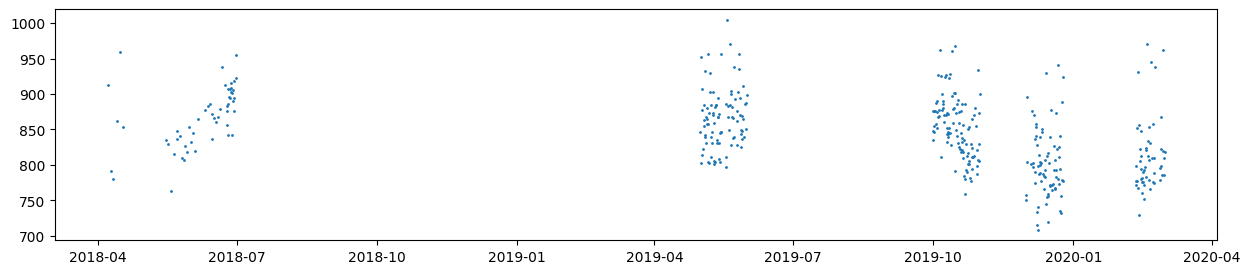

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.scatter(acms_bcr['reportts'], acms_bcr['egt'], s=1)
plt.show()

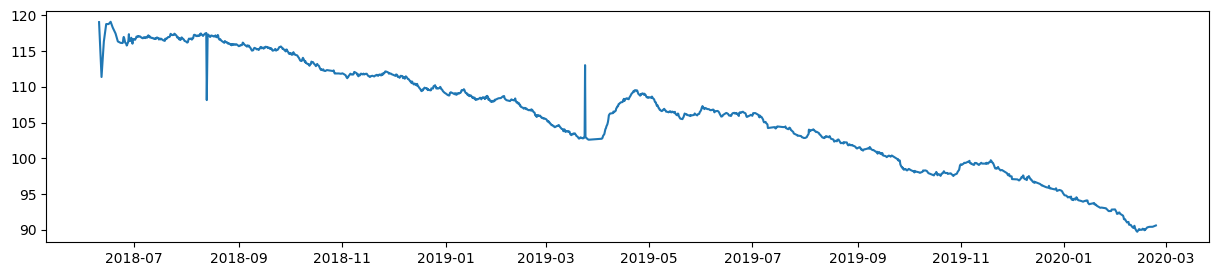

In [30]:
plt.figure(figsize=(15, 3))
bcr = df[(df['AIRCRAFT'] == 'VQ-BCR') & (df['POSITION'] == 1) & (df['EGTM'] < 140)].sort_values('RECORDED_DT')
plt.plot(bcr['RECORDED_DT'], bcr['EGTM'])

In [8]:
bcr

,AIRCRAFT,POSITION,ESN,RECORDED_DT,EGTM,N1 track Vib (Turb),ACC,ITT
850,VQ-BCR,1,770415,2018-06-10 09:04:19,119.061,NaN,NaN,NaN
851,VQ-BCR,1,770415,2018-06-11 20:00:21,111.386,NaN,NaN,NaN
852,VQ-BCR,1,770415,2018-06-13 04:44:52,116.337,NaN,NaN,NaN
853,VQ-BCR,1,770415,2018-06-14 14:04:45,118.788,NaN,NaN,NaN
854,VQ-BCR,1,770415,2018-06-16 00:35:23,118.790,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2245,VQ-BCR,1,770415,2020-02-17 20:11:45,90.034,NaN,-20.0,845.8
2246,VQ-BCR,1,770415,2020-02-18 23:08:44,90.343,0.08,-20.0,838.7
2247,VQ-BCR,1,770415,2020-02-20 05:01:44,90.425,0.11,-20.0,843.9
2248,VQ-BCR,1,770415,2020-02-22 04:09:46,90.434,0.07,-20.0,876.3
